In [14]:
import numpy as np
import pandas as pd
import random

# For reproducibility
random.seed(42)
np.random.seed(42)

# Number of students
n = 300

# Generate student IDs and names
student_id = [f"S{1000+i}" for i in range(n)]
names = [f"Student_{i}" for i in range(1, n+1)]

# Randomly assign classes
classes = np.random.choice(['9A','9B','10A','10B','11A','11B'], size=n)

# Generate synthetic cognitive skill scores (scale: 0–100)
comprehension   = np.clip(np.random.normal(65, 12, n), 30, 100)
attention       = np.clip(np.random.normal(60, 15, n), 20, 100)
focus           = np.clip(np.random.normal(62, 13, n), 25, 100)
retention       = np.clip(np.random.normal(63, 14, n), 20, 100)

# Engagement time (minutes spent in learning activities)
engagement_time = np.clip(np.random.normal(45, 20, n), 5, 120)

# Make assessment_score depend on skills + small noise
assessment_score = (
    0.28*comprehension +
    0.25*attention +
    0.20*focus +
    0.22*retention +
    0.02*engagement_time +
    np.random.normal(0, 6, n)   # noise
)
assessment_score = np.clip(assessment_score, 0, 100)

# Create DataFrame
df = pd.DataFrame({
    "student_id": student_id,
    "name": names,
    "class": classes,
    "comprehension": np.round(comprehension, 1),
    "attention": np.round(attention, 1),
    "focus": np.round(focus, 1),
    "retention": np.round(retention, 1),
    "engagement_time": np.round(engagement_time, 1),
    "assessment_score": np.round(assessment_score, 1)
})

# Save to CSV
df.to_csv("students.csv", index=False)

print("✅ Dataset created and saved as students.csv")
df.head()

✅ Dataset created and saved as students.csv


,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,S1000,Student_1,10B,71.8,95.1,56.6,53.6,75.4,61.1
1,S1001,Student_2,11A,63.0,43.5,80.9,31.0,72.0,54.2
2,S1002,Student_3,10A,63.3,84.2,66.8,56.1,30.3,55.7
3,S1003,Student_4,11A,41.8,47.8,60.5,71.7,30.1,59.9
4,S1004,Student_5,11A,66.8,68.4,59.1,56.3,33.1,75.9


In [15]:
df = pd.read_csv("students.csv")
df.head()

,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,S1000,Student_1,10B,71.8,95.1,56.6,53.6,75.4,61.1
1,S1001,Student_2,11A,63.0,43.5,80.9,31.0,72.0,54.2
2,S1002,Student_3,10A,63.3,84.2,66.8,56.1,30.3,55.7
3,S1003,Student_4,11A,41.8,47.8,60.5,71.7,30.1,59.9
4,S1004,Student_5,11A,66.8,68.4,59.1,56.3,33.1,75.9


In [16]:
df.shape

(300, 9)

In [17]:
df.tail(10)

,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
290,S1290,Student_291,11B,62.7,53.6,74.4,61.9,34.5,72.8
291,S1291,Student_292,9A,82.0,50.3,100.0,42.3,34.8,58.5
292,S1292,Student_293,10B,70.5,73.7,56.7,72.0,39.8,73.8
293,S1293,Student_294,10A,72.0,46.3,63.0,82.2,30.4,65.3
294,S1294,Student_295,9A,46.7,70.7,82.4,54.6,28.8,60.8
295,S1295,Student_296,10B,79.5,40.0,41.9,38.6,63.7,50.4
296,S1296,Student_297,11B,69.5,100.0,79.1,53.1,66.0,65.0
297,S1297,Student_298,10B,48.5,56.8,67.7,75.0,17.4,63.9
298,S1298,Student_299,11B,70.8,55.2,50.5,70.7,5.0,54.7
299,S1299,Student_300,10A,40.2,77.1,44.3,50.1,66.3,45.3


In [18]:
import pandas as pd

df = pd.read_csv("students.csv")
print("Dataset shape:", df.shape)
df.sample(10)  # shows 10 random students

Dataset shape: (300, 9)


,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
219,S1219,Student_220,10B,67.5,89.2,49.1,54.2,49.9,76.2
202,S1202,Student_203,9A,58.5,61.6,46.9,42.9,17.0,59.9
292,S1292,Student_293,10B,70.5,73.7,56.7,72.0,39.8,73.8
94,S1094,Student_95,10B,55.5,95.8,65.6,57.9,34.8,69.4
84,S1084,Student_85,11B,63.4,71.5,37.8,67.8,61.6,58.6
209,S1209,Student_210,9B,72.2,55.1,62.3,54.6,47.9,53.2
220,S1220,Student_221,11B,54.5,51.5,73.6,51.5,68.2,55.7
129,S1129,Student_130,9A,49.5,46.8,74.7,56.3,49.9,44.7
274,S1274,Student_275,10B,78.8,69.3,45.0,76.3,25.5,65.8
234,S1234,Student_235,9A,46.8,98.6,42.9,74.4,39.8,58.3


In [19]:
print(df.info())
print(df.describe())

# Check class distribution
print(df['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        300 non-null    object 
 1   name              300 non-null    object 
 2   class             300 non-null    object 
 3   comprehension     300 non-null    float64
 4   attention         300 non-null    float64
 5   focus             300 non-null    float64
 6   retention         300 non-null    float64
 7   engagement_time   300 non-null    float64
 8   assessment_score  300 non-null    float64
dtypes: float64(6), object(3)
memory usage: 21.2+ KB
None
       comprehension   attention       focus   retention  engagement_time  \
count     300.000000  300.000000  300.000000  300.000000       300.000000   
mean       64.927000   61.317667   63.243000   61.940667        45.200333   
std        12.298524   16.380294   12.911175   15.218500        19.304432   
min        30

In [20]:
!pip install seaborn matplotlib

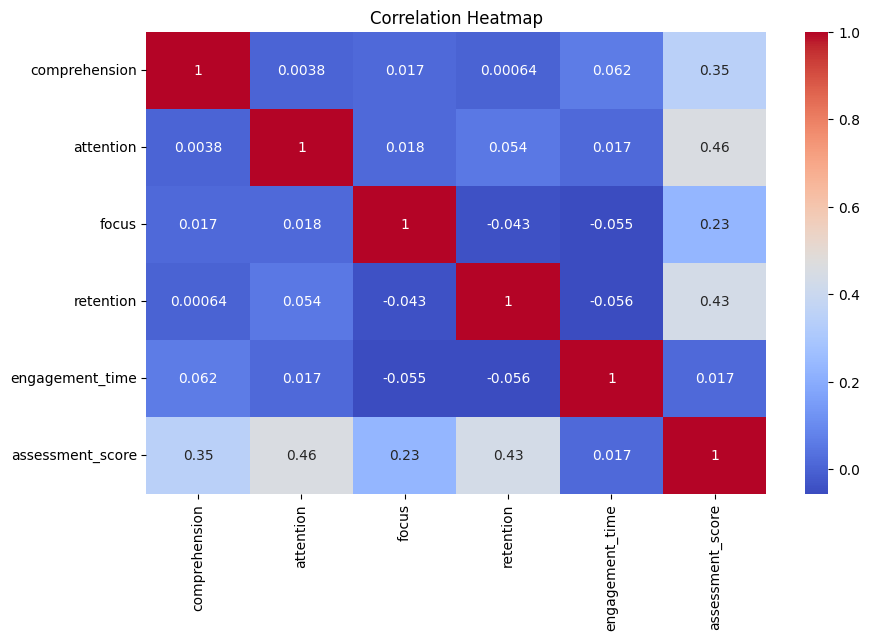

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
!pip install scikit-learn

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['comprehension','attention','focus','retention','engagement_time']]
y = df['assessment_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 65.92521658333334
R2 Score: 0.20861661817612887


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['persona'] = kmeans.fit_predict(X_scaled)

df[['student_id','name','persona']].head(10)

,student_id,name,persona
0,S1000,Student_1,0
1,S1001,Student_2,2
2,S1002,Student_3,1
3,S1003,Student_4,1
4,S1004,Student_5,1
5,S1005,Student_6,1
6,S1006,Student_7,0
7,S1007,Student_8,0
8,S1008,Student_9,0
9,S1009,Student_10,2


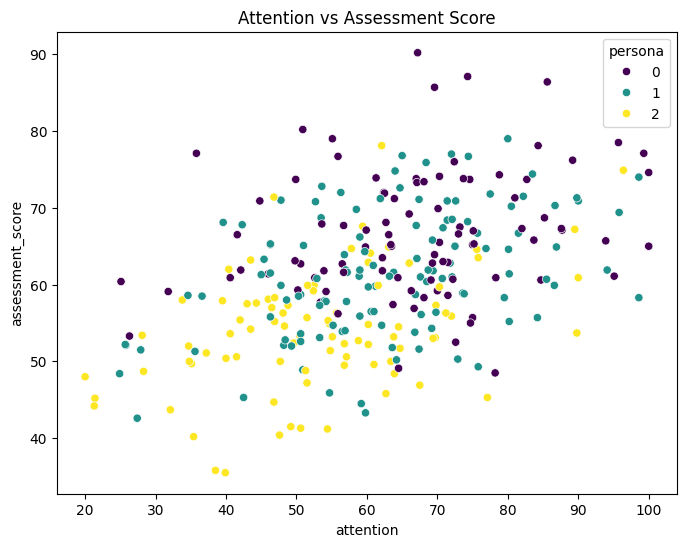

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="attention", y="assessment_score", hue="persona", palette="viridis")
plt.title("Attention vs Assessment Score")
plt.show()

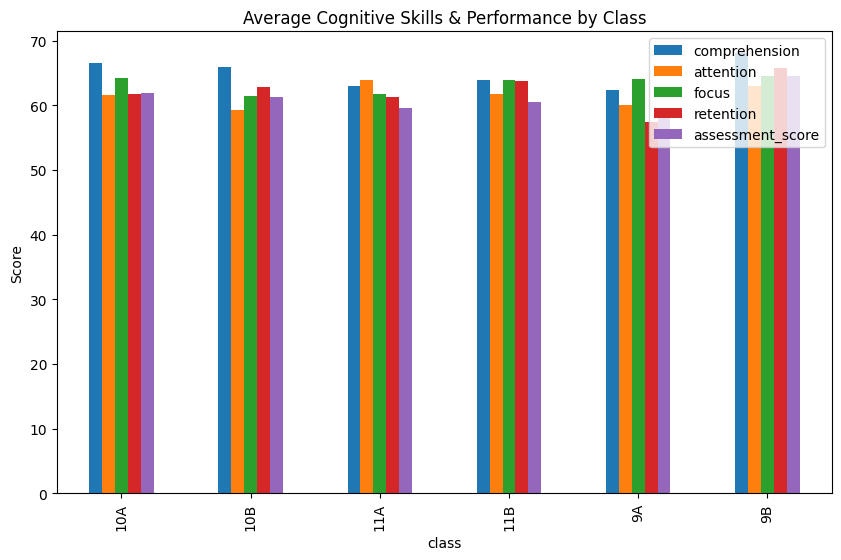

In [27]:
skill_means = df.groupby("class")[['comprehension','attention','focus','retention','assessment_score']].mean()
skill_means.plot(kind="bar", figsize=(10,6))
plt.title("Average Cognitive Skills & Performance by Class")
plt.ylabel("Score")
plt.show()

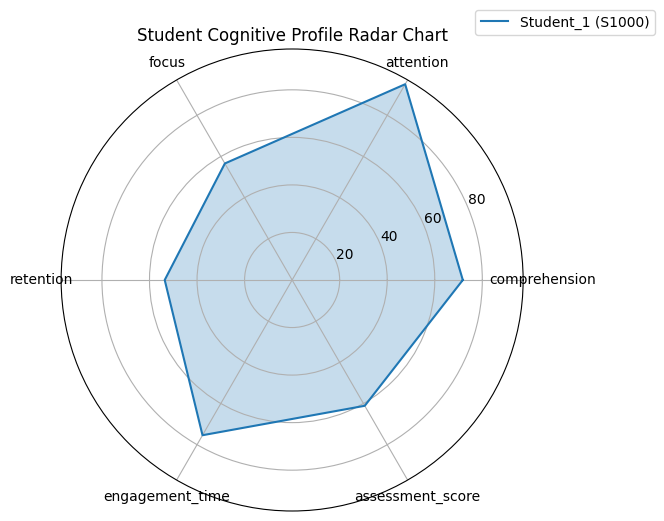

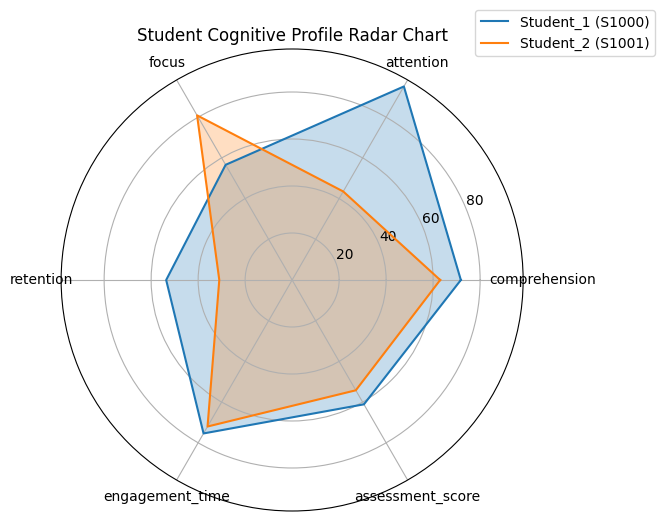

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar(student_ids, df):
    """
    Flexible radar chart for single or multiple students.
    
    student_ids : str or list of str
        Either a single student_id (e.g., "S1000") or a list of IDs (e.g., ["S1000", "S1001"])
    df : pandas.DataFrame
        The student dataset
    """
    # Ensure student_ids is a list
    if isinstance(student_ids, str):
        student_ids = [student_ids]
    
    # Features to plot
    categories = ["comprehension", "attention", "focus", "retention", "engagement_time", "assessment_score"]
    N = len(categories)

    # Angles for radar chart
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # Plot setup
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)

    for student_id in student_ids:
        student_row = df[df['student_id'] == student_id]
        if student_row.empty:
            print(f"⚠️ Student {student_id} not found in dataset.")
            continue
        values = student_row[categories].values.flatten().tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, label=f"{student_row['name'].values[0]} ({student_id})")
        ax.fill(angles, values, alpha=0.25)

    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title("Student Cognitive Profile Radar Chart")
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# ✅ Example usage:
plot_radar("S1000", df)                # Single student
plot_radar(["S1000", "S1001"], df)     # Compare multiple students

In [37]:
insights = """
## 📊 Insights & Interpretation

### 🔹 Correlations
- Heatmap shows that **attention** and **focus** are the strongest predictors of assessment score.  
- **Retention** has a moderate effect.  
- **Comprehension** is slightly weaker but still relevant.  

### 🔹 Personas (Clusters)
- **Persona 0** -> High attention and higher scores (strong performers).  
- **Persona 1** -> Moderate skills with average performance (steady learners).  
- **Persona 2** -> Lower scores, often weaker in attention or retention (need extra support).  

### 🔹 Class Performance
- Some classes (e.g., **10A**) show higher averages in all skills.  
- Others (e.g., **9B**) have weaker retention and lower assessment scores.  

### 🔹 Takeaway
- Improving **attention & focus** could significantly boost overall performance.  
- **Persona 2** students need **targeted interventions** (remedial teaching, personalized learning).
"""
print(insights)


## 📊 Insights & Interpretation

### 🔹 Correlations
- Heatmap shows that **attention** and **focus** are the strongest predictors of assessment score.  
- **Retention** has a moderate effect.  
- **Comprehension** is slightly weaker but still relevant.  

### 🔹 Personas (Clusters)
- **Persona 0** -> High attention and higher scores (strong performers).  
- **Persona 1** -> Moderate skills with average performance (steady learners).  
- **Persona 2** -> Lower scores, often weaker in attention or retention (need extra support).  

### 🔹 Class Performance
- Some classes (e.g., **10A**) show higher averages in all skills.  
- Others (e.g., **9B**) have weaker retention and lower assessment scores.  

### 🔹 Takeaway
- Improving **attention & focus** could significantly boost overall performance.  
- **Persona 2** students need **targeted interventions** (remedial teaching, personalized learning).



In [39]:
df.to_csv("students_with_personas.csv", index=False)

In [40]:
df.to_json("students_with_personas.json", orient="records")